Updated DataFrame with Wait Time and Consultation Duration:
    Patient_ID        Arrival_Time Consultation_Start_Time  \
0            1 1900-01-01 09:00:00     1900-01-01 09:15:00   
1            2 1900-01-01 09:05:00     1900-01-01 09:20:00   
2            3 1900-01-01 09:10:00     1900-01-01 09:30:00   
3            4 1900-01-01 09:15:00     1900-01-01 09:35:00   
4            5 1900-01-01 09:20:00     1900-01-01 09:40:00   
5            6 1900-01-01 09:25:00     1900-01-01 09:45:00   
6            7 1900-01-01 09:30:00     1900-01-01 09:50:00   
7            8 1900-01-01 09:35:00     1900-01-01 09:55:00   
8            9 1900-01-01 09:40:00     1900-01-01 10:00:00   
9           10 1900-01-01 09:45:00     1900-01-01 10:05:00   
10          11 1900-01-01 09:50:00     1900-01-01 10:10:00   
11          12 1900-01-01 09:55:00     1900-01-01 10:15:00   
12          13 1900-01-01 10:00:00     1900-01-01 10:20:00   
13          14 1900-01-01 10:05:00     1900-01-01 10:25:00   
14        

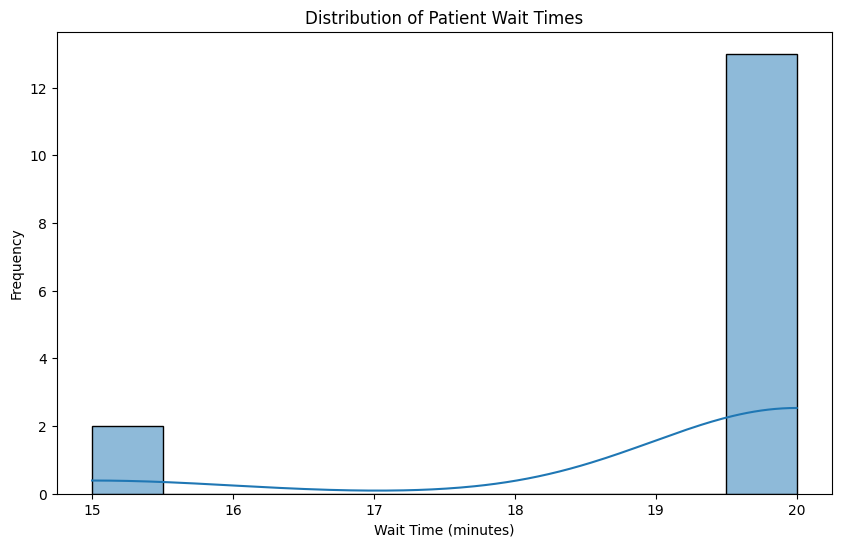

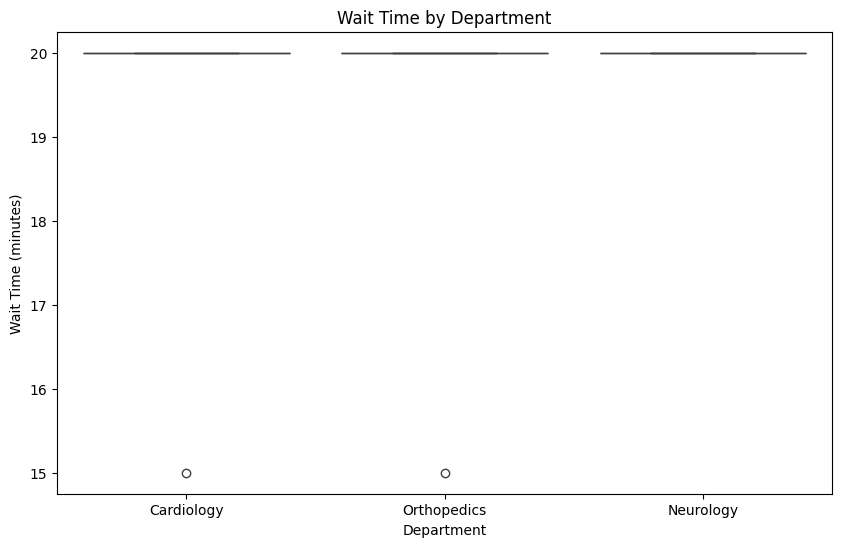

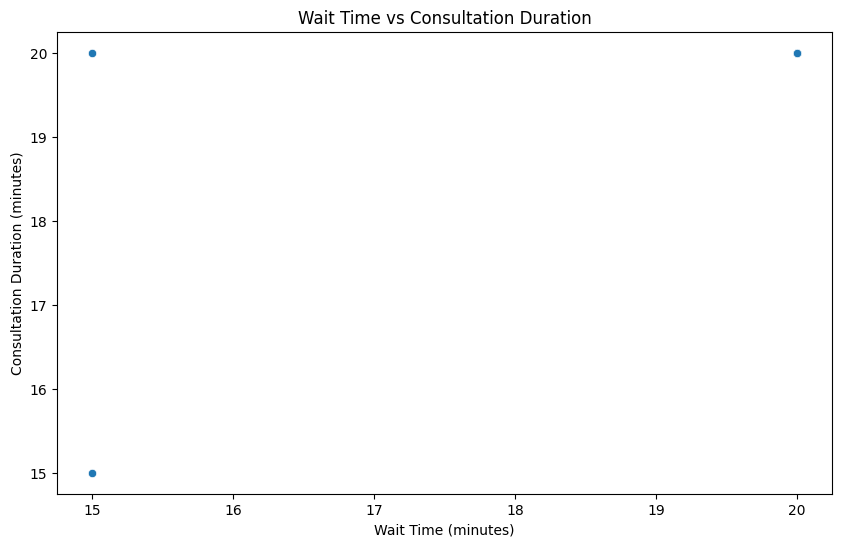


Average Wait Time by Doctor:
  Doctor_ID  Wait_Time
0        D1  19.166667
1        D2  19.000000
2        D3  20.000000

Analysis results saved to 'patient_wait_times_analysis.csv'


In [1]:
 # Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
data = """
Patient_ID,Arrival_Time,Consultation_Start_Time,Consultation_End_Time,Doctor_ID,Department
1,09:00,09:15,09:30,D1,Cardiology
2,09:05,09:20,09:40,D2,Orthopedics
3,09:10,09:30,09:50,D1,Cardiology
4,09:15,09:35,09:55,D3,Neurology
5,09:20,09:40,10:00,D2,Orthopedics
6,09:25,09:45,10:05,D1,Cardiology
7,09:30,09:50,10:10,D3,Neurology
8,09:35,09:55,10:15,D2,Orthopedics
9,09:40,10:00,10:20,D1,Cardiology+
10,09:45,10:05,10:25,D3,Neurology
11,09:50,10:10,10:30,D2,Orthopedics
12,09:55,10:15,10:35,D1,Cardiology
13,10:00,10:20,10:40,D3,Neurology
14,10:05,10:25,10:45,D2,Orthopedics
15,10:10,10:30,10:50,D1,Cardiology
"""
# Write data to a CSV file
with open('patient_wait_times.csv', 'w') as file:
    file.write(data.strip())

# Read the dataset
df = pd.read_csv('patient_wait_times.csv')

# Step 3: Convert time columns to datetime
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M')
df['Consultation_Start_Time'] = pd.to_datetime(df['Consultation_Start_Time'], format='%H:%M')
df['Consultation_End_Time'] = pd.to_datetime(df['Consultation_End_Time'], format='%H:%M')

# Step 4: Calculate wait time (in minutes)
df['Wait_Time'] = (df['Consultation_Start_Time'] - df['Arrival_Time']).dt.total_seconds() / 60

# Step 5: Calculate consultation duration (in minutes)
df['Consultation_Duration'] = (df['Consultation_End_Time'] - df['Consultation_Start_Time']).dt.total_seconds() / 60

# Step 6: Display the updated dataframe
print("Updated DataFrame with Wait Time and Consultation Duration:")
print(df)

# Step 7: Basic statistics of wait times
print("\nWait Time Statistics:")
print(df['Wait_Time'].describe())
# Step 8: Visualize wait times
plt.figure(figsize=(10, 6))
sns.histplot(df['Wait_Time'], bins=10, kde=True)
plt.title('Distribution of Patient Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Step 9: Wait time by department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Wait_Time', data=df)
plt.title('Wait Time by Department')
plt.xlabel('Department')
plt.ylabel('Wait Time (minutes)')
plt.show()

# Step 10: Correlation between wait time and consultation duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wait_Time', y='Consultation_Duration', data=df)
plt.title('Wait Time vs Consultation Duration')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Consultation Duration (minutes)')
plt.show()

# Step 11: Average wait time by doctor
avg_wait_time_by_doctor = df.groupby('Doctor_ID')['Wait_Time'].mean().reset_index()
print("\nAverage Wait Time by Doctor:")
print(avg_wait_time_by_doctor)

# Step 12: Save results to a new CSV file
df.to_csv('patient_wait_times_analysis.csv', index=False)
print("\nAnalysis results saved to 'patient_wait_times_analysis.csv'")